<a href="https://colab.research.google.com/github/RezaulKarim-tech/CV-project/blob/master/ML_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/multidiseaseprediction/heart.csv",sep='\t')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop(columns = 'target', axis=1)
y = df['target']

# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 2022,stratify=y)

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
def clac(y_test, y_pred, classifier):
  from sklearn.metrics import confusion_matrix
 
  print("Classifier name: ", classifier)
  print(classification_report(y_test, y_pred))

  #cm = confusion_matrix(y_pred.round(),y_test)
  cm = confusion_matrix(y_test,y_pred)
  cmd_obj = ConfusionMatrixDisplay(cm)
  cmd_obj.plot()


# Parameter Tuning

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes' :{
        'model': MultinomialNB(),
        'params':{
        }
    },

    'Decision_tree': {
        'model' : DecisionTreeClassifier(random_state =10),
        'params': { 
            'criterion': ['entropy','gini']
        }
    },

    'KNN': {
        'model' : KNeighborsClassifier(metric='minkowski',n_neighbors = 1),
        'params': { 
            #'n_neighbors': list(range(1,15,2)),
            'p': [1,2]
        }
    }
    
    
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.801667,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.797000,{'n_estimators': 10}
2,logistic_regression,0.818000,{'C': 1}
3,naive_bayes,0.739167,{}
4,Decision_tree,0.739167,{'criterion': 'entropy'}
5,KNN,0.661667,{'p': 1}


# Training and comparison among the models

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.82 (0.073002)
test accuracy: 0.87
KNN: 0.61 (0.094736)
test accuracy: 0.52
DT: 0.75 (0.107274)
test accuracy: 0.75
RF: 0.82 (0.053656)
test accuracy: 0.84
MNB: 0.74 (0.063255)
test accuracy: 0.75
SVM: 0.80 (0.063879)
test accuracy: 0.87
SGD: 0.63 (0.074604)
test accuracy: 0.69


<ipython-input-8-28553082a249>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


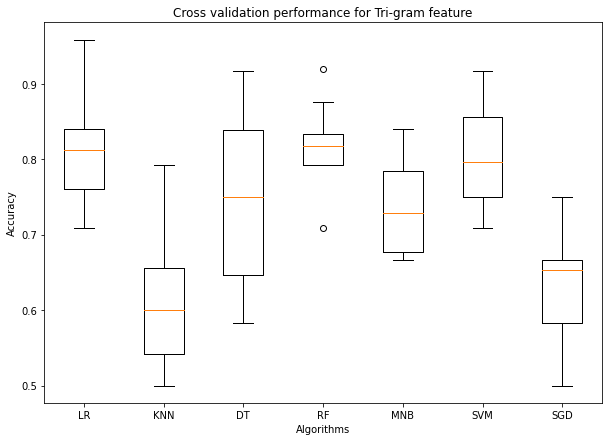

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as detailed_score

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier( n_neighbors =1, metric = 'minkowski', p=2)))
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('RF', RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)))
models.append(('MNB', MultinomialNB()))
models.append(('SVM', SVC(kernel = 'linear',probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(loss="log", penalty="l2", max_iter=1000)))

# evaluate each model in turn
scores =[] 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	#kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
  #print("training:{}".format(model))
  #print("CV score: {:0.2f}".format(cv_results.mean()))
  model.fit(X_train,y_train)
  test_accuracy = model.score(X_test,y_test)
  y_pred = model.predict(X_test)
  precision,recall,fscore,support=detailed_score(y_test,y_pred,average='macro')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %0.2f (%f)" % (name, cv_results.mean(), cv_results.std())
  #msg = "%s: %0.2f"% (name,test_accuracy)
  print(msg)
  print("test accuracy: {:0.2f}".format(test_accuracy))
  scores.append( 
      {
          'model': name,
          'cv_score': "%0.2f" %(cv_results.mean()),
          'test_score': "%0.2f" %(test_accuracy),
          'precision': "%0.2f" %(precision),
          'recall': "%0.2f" %(recall),
          'f1_score': "%0.2f" %(fscore),
             
      }
      
      )
# boxplot algorithm comparison
#plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
plt.title('Cross validation performance for Tri-gram feature')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#plt.savefig('result.png')


In [ ]:
output_df = pd.DataFrame(scores,columns=['model','cv_score','test_score','precision','recall','f1_score'])

In [ ]:
print("Comparison of models")
output_df

Comparison of models


,model,cv_score,test_score,precision,recall,f1_score
0,LR,0.82,0.87,0.90,0.86,0.86
1,KNN,0.61,0.52,0.53,0.53,0.52
2,DT,0.75,0.75,0.76,0.76,0.75
3,RF,0.82,0.84,0.83,0.83,0.83
4,MNB,0.74,0.75,0.75,0.75,0.75
5,SVM,0.80,0.87,0.89,0.86,0.86
6,SGD,0.63,0.69,0.77,0.66,0.64


# The best model: Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier name:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.80      1.00      0.89        33

    accuracy                           0.87        61
   macro avg       0.90      0.86      0.86        61
weighted avg       0.89      0.87      0.87        61



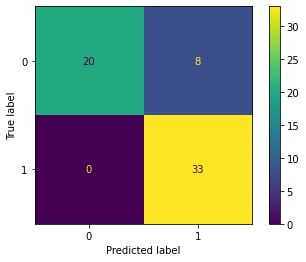

In [ ]:


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C =1)
clf.fit(X_train,y_train)

# Prediction
y_pred = clf.predict(X_test)

######################### Evaluation Measures
#  Calculation
clac(y_test,y_pred, "Logistic Regression")